# Практическая работа №1: Алгоритмы эффективного вычисления одночленов


Выполнила студентка гр. 1303 Сырцева Дарья.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

#### Бинарный метод $"SX"$.
1. Записать число n в бинарном виде:
$n =  (a_m\cdot a_{m-1}\cdot...\cdot a_2\cdot a_1)_2$, где $a_m = 1$
2. Отбросить старший бит $:(a_{m-1}\cdot a_{m-2}\cdot...\cdot a_2\cdot a_1)_2$
3. Сделать замену по правилу:$\newline a_i = 1 \implies a_i = "SX"\newline a_i = 0\implies a_i = "S"$
4. Выполнить вычисления, где $"S"$ - возведение в квадрат, $"X"$ - умножение на $x$
* Число операций для бинарного метода $"SX" = \lambda(n)+\nu(n) - 1$ 
* $\lambda(n) = \lfloor log_{2}(n) \rfloor$ - уменьшенная на единицу длина бинарной записи числа $n.$ 
* $\nu(n)$ - вес Хэмминга для бинарной записи числа $n$ (количество ненулевых цифр).

#### Метод возведения в степень справа налево.
Изначально переменные проинициализируем так: $N:=n, y:=1, z:=x$.
1. Если число четное, то выполняем пункт 2, иначе пункт 3.
2. $N=floor(N/2), z = z^2$, где floor - округление вниз.
3.$N=floor(N/2), y = z\cdot y$.
4. Если $N$ равно 0, то возвращаем $y$ - алгоритм закончен, иначе $z = z^2$ 
* Число операций для бинарного метода возведения в степень справа налево = $\lambda(n)+\nu(n).$

#### Метод множителей.
1. Представить $n = p\cdot q$, где $p$ - наименьший простой множитель $n, q > 1$. Таким образом $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q.$
2. Если $n$ - простое, то вычислим $x^{n-1}$ и умножим его на $x$. Если $n=1$, то получим $x^n$ без вычислений.
* Применяя эти правила можно получить значение $x^n$, при любом $n\in \mathbb{N}.$

### Дерево степеней.
* Пусть построе $k$-ый уровень дерева. Необходимо построить $(k+1)$-ый уровень. 
* Берем каждый узел $n$ на $k$-ом уровне слева направо и присоединяем к нему узлы снизу.
$n+a_0, n+a_1, n+a_2,..,n+a_{k-1}=2n.$
* Порядок присоединения важен. Если какой-то узел уже присутствовал раньше, то он устраняется. 

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

1) С помощью системы компьютерной алгебры SageMath реализовать бинарный метод $"SX"$. Вывести последовательность $"S"$ и $"X"$ для заданного числа $n$. Последовательно вывести значения $x$ $i$ после каждой итерации. Сделать выводы.

In [21]:
def M_SX(n):
    n = n.binary()# переведем число n в двоичную систему 
    n = n[1::]# отбросим старший бит

    array='' # хранит последовательность SX
    for el in n:
        if el=='0' :
            array+='S'
        else:
            array+='SX'
    print("Получившаяся последовательность:", array)# таким образом получили последовательность символов S и X
    # теперь с помощью получившейся последовательностью возведем в степень
    res = x # изначально, результат - x 
    i = 0
    print("Шаг 0 :", res)
    for i in range(len(array)):# пройдемся по всем символам последовательности
        if array[i] == "S":# если очередной символ - S, то возведем в квадарт
            res *= res
        else:# иначе, умножим на x
            res *= x
        i += 1
        print("Шаг", i, ":",res)# осуществление вывода после каждой итерации
    return res

Теперь проверим, корректно ли работает написанная функция.
Сначала для $n = 23$(7итераций).

In [22]:
M_SX(23)

Получившаяся последоватлеьность: SSXSXSX
Шаг 0 : x
Шаг 1 : x^2
Шаг 2 : x^4
Шаг 3 : x^5
Шаг 4 : x^10
Шаг 5 : x^11
Шаг 6 : x^22
Шаг 7 : x^23


x^23

Теперь для $n = 36$:

In [23]:
M_SX(36)

Получившаяся последоватлеьность: SSSXSS
Шаг 0 : x
Шаг 1 : x^2
Шаг 2 : x^4
Шаг 3 : x^8
Шаг 4 : x^9
Шаг 5 : x^18
Шаг 6 : x^36


x^36

 И для $n = 55$:

In [24]:
M_SX(55)

Получившаяся последоватлеьность: SXSSXSXSX
Шаг 0 : x
Шаг 1 : x^2
Шаг 2 : x^3
Шаг 3 : x^6
Шаг 4 : x^12
Шаг 5 : x^13
Шаг 6 : x^26
Шаг 7 : x^27
Шаг 8 : x^54
Шаг 9 : x^55


x^55

Теперь проверим, совпадает ли теоретическая оценка с полученным результатом, например для последнего примера, где $n = 55.$
$\lambda(n) = \lfloor log_{2}(n) \rfloor = 5, $
$\nu(n) = 5$
* Теоретическая оценка количества операций метода $"SX" = 5+5 - 1 = 9$. 
* Количество реальных операций = 9.

Вывод:
Таким образом, мы наглядно убедились в том, что написанная функция работает корректно, а также в том, что теоретическая оценка совпадает с реальным результатом.
Кроме того количество шагов зависит от бинарной записи числа таким образом: чем больше единиц, тем больше итераций.

2) Реализовать бинарный метод возведения в степень справа налево.
Привести пример работы программы на нескольких значениях $𝑛$.
Для каждого $𝑛$ результат выводить в виде таблицы.
Для начала реализуем метод:

In [29]:
def M_RL(n):
    N=n #проинициализируем значения
    z=x
    y=1
    i=0
    print("i\t N\t z\t y")
    print(i,'\t', N,'\t',z,'\t',y) #вывод нулевого шага алгоритма(нетабличный вывод)

    while 1: #реализация самого алгоритма
        if N%2==0:
            N=floor(N/2)
            z=z*z
        else:
            N=floor(N/2)
            y=z*y
            if N!=0:
                z=z*z
            else:
                break
        i=i+1  
        print(i,'\t', N,'\t',z,'\t',y) #промежуточный вывод
   
    print(i+1,'\t', N,'\t',z,'\t',y)


Теперь проверим, корректно ли работает написанная функция.
Сначала для $n = 23$.

In [35]:
M_RL(23)

i	 N	 z	 y
0 	 23 	 x 	 1
1 	 11 	 x^2 	 x
2 	 5 	 x^4 	 x^3
3 	 2 	 x^8 	 x^7
4 	 1 	 x^16 	 x^7
5 	 0 	 x^16 	 x^23


| № итерации | Значение N | Значение y | Значение z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     23     |      1     |     $x$    |
|      1     |     11     |     $x$    |    $x^2$    |
|      2     |      5     |     $x^3$    |    $x^4$   |
|      3     |      2     |    $x^7$   |    $x^8$   |
|      4     |      1     |    $x^7$   |   $x^{16}$  |
|      5     |      0     |    $x^{23}$   |   $x^{16}$  |

Теперь для $n = 36$

In [32]:
M_RL(36)

i	 N	 z	 y
0 	 36 	 x 	 1
1 	 18 	 x^2 	 1
2 	 9 	 x^4 	 1
3 	 4 	 x^8 	 x^4
4 	 2 	 x^16 	 x^4
5 	 1 	 x^32 	 x^4
6 	 0 	 x^32 	 x^36


| № итерации | Значение N | Значение y | Значение z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     36     |      1     |     $x$    |
|      1     |     18     |     $1$    |    $x^2$    |
|      2     |      9     |     $1$    |    $x^4$   |
|      3     |      4     |    $x^4$   |    $x^8$   |
|      4     |      2     |    $x^4$   |   $x^{16}$  |
|      5     |      1     |    $x^4$   |   $x^{32}$  |
|      6     |      0     |    $x^{36}$|   $x^{32}$  |

И для $n = 55$

In [36]:
M_RL(55)

i	 N	 z	 y
0 	 55 	 x 	 1
1 	 27 	 x^2 	 x
2 	 13 	 x^4 	 x^3
3 	 6 	 x^8 	 x^7
4 	 3 	 x^16 	 x^7
5 	 1 	 x^32 	 x^23
6 	 0 	 x^32 	 x^55


| № итерации | Значение N | Значение y | Значение z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     55     |      1     |     $x$    |
|      1     |     27     |     $x$    |    $x^2$    |
|      2     |     13     |     $x^3$  |    $x^4$   |
|      3     |      6     |    $x^7$   |    $x^8$   |
|      4     |      3     |    $x^7$   |   $x^{16}$  |
|      5     |      1     |    $x^{23}$|   $x^{32}$  |
|      6     |      0     |    $x^{55}$|   $x^{32}$  |

Теперь проверим оценку количества итераций для различных $n$.
Cперва для $n=23$, а потом для $n=55:$
$\lambda(23) = \lfloor log_{2}(23) \rfloor = 4,\nu(23) = 4 \implies  \lambda(23) + \nu(23) = 8 \implies$ верно<br>
$\lambda(55) = \lfloor log_{2}(55) \rfloor = 5,\nu(55) = 5 \implies  \lambda(23) + \nu(23) = 10 \implies$ верно<br>
Таким образом, мы убедились в том, что вычисления проведены корректно.

Вывод:
Таким образом, мы наглядно убедились в том, что написанная функция работает корректно. По мимо этого, в общем случае, $z$ после завершения адгоритма = $x^{2^i}$, где $i$ - шаг, после которого $N$ стало равна нулю. Например, для 23 - шаг 4.

3) Сравнить бинарный метод «SX» и метод возведения в степень справа налево. Каково количество итераций в каждом случае. Сделать выводы.<br><br>
Число операций для бинарного метода «SX» равно $\lambda(n) + \nu(n)-1$<br>
Число операций для метода возведения справа налево равно $\lambda(n) + \nu(n)$
Проверим теоритические данные, используя полученные раннее результаты.<br>Например, возьмем $n=23$:<br>
$\lambda(23) = 4, \nu(23) = 4$<br>
Следовательно, в методе «SX» нам понадобиться $4+4-1=7$ итераций, а в методе справа налево $4+4=8$ итераций.

Аналогично осуществим проверку для $n=55$:<br>
$\lambda(55) = 5, \nu(55) = 5$<br>
Следовательно, в методе «SX» нам понадобиться $5+5-1=9$ итераций, а в методе справа налево $5+5=10$ итераций.

Анализируя полученный результат, можем сделать вывод о том, что бинарный метод «SX» всегда будет выполнен за меньшее количество операций.

4) Для ранее приведённых 𝑛 вручную выполнить метод множителей.
Показать преимущества данного метода по сравнению с предыдущими. Привести примеры когда метод множителей будет давать
результат хуже, чем бинарный метод «SX». Сделать выводы.


$n = 55$<br>
$n = p\cdot q = 5\cdot 11$<br>
$y = x^5 = x^4 \cdot x \implies$ 1 итерация<br>
$z = x^4 = (x^2)^2 \implies$ 2 итерации (2 раза в квадрат)<br>
$y^{11} = y^{10}\cdot y \implies$ 1 итерация<br>
$y^{10} = (y^5)^2\implies$ 4 итерации, так как $y^5\implies$3 итерации и возведение в квадрат + еще одна<br>
Таким образом, чтобы получить $x^5$ нужно 3 итерации, а чтобы получить y^{11} 5 итераций.<br>
Тогда для того чтобы получить $x^{55}$ понадобится ровно 8 итераций.<br>
Нетрудно заметить, что для $n=55$ метод множителей работает лучше, чем метод $"SX"$ на одну итерацию.

$n = 23$ - простое<br>
$x^{23} = x^{22}\cdot x \implies$ 1 операция<br>
$x^{22} = (x^{11})^2$<br>
$x^2\implies$  1 операция, $x\cdot x$<br>
$x^{11} = x^{10}\cdot x \implies$ 5 операций, было доказано выше<br>
Тогда для того чтобы получить $x^{23}$ понадобится ровно 7 операций. Получили такой же результат, как и в методе $"SX"$.<br> 

Теперь приведем пример, когда метод множителей будет работать хуже, чем бинарный метод «SX».
Рассмотрим $n=33$<br>
Сначала рассмотрим, сколько будет операций в методе «SX».<br>
$\lambda(33) = \lfloor log_{2}(33) \rfloor = 5,\nu(33) = 2 \implies  \lambda(33) + \nu(33) - 1 = 6.$ Итого 6 операций.<br>
Теперь рассмотрим метод множителей.<br>
$n=33$
$n = p\cdot q = 3\cdot 11$<br>
$y = x^3 = x^2 \cdot x \implies$ 1 итерация<br>
$z = x^2 \implies$ 1 итерация<br>
$y = x^{11}\implies$ 5 итераций, было доказано выше.<br>
Тогда для того чтобы получить $x^{33}$ понадобится ровно 7 операций. Однако в методе «SX» получилось 6 операций.<br><br>
Вывод: подводя итог, можно сделать вывод о том, что метод множителей не всегда дает результат лучше, чем, например, метод «SX».
Однако методом простых множителей нетрудно вручную вычислить число операций для возведения числа в степень. А также зачастую количество операций при методе множителей получается все же меньше, чем при других методах.

5) Реализовать алгоритм «дерева степеней». Отобразить дерево средствами SageMath до заданного уровня 𝑘. Выделить цветом путь от вершины дерева до заданного числа 𝑛. Сравнить данный метод с предыдущими. Сделать выводы.


In [ ]:
def create_tree(k):
    n = False # вершина, до которой нужно построить дерево
    tree = Graph() #создадим граф 
    tree.add_vertex(1) # добавим первую вершину
    old_vertices = [1] # уже просмотренные вершины
    while n != True:   # выполняем действия до тех пор, пока в нашем дереве не окажется нужная вершина
        new_vertices = []  # список новых вершин
        for el in old_vertices: # осуществим проход по старым вершинам
            path = tree.shortest_path(1, el) # функция возвращает кратчайший путь от единицы до вершины
            for elem in path: # проход по всем вершинам данного пути
                new_vert = el + elem # формируем новую вершину
                if new_vert not in tree.vertices(): # проверяем, не встречалась ли данная вершина раньше, если нет то
                    tree.add_vertex(new_vert) # добавляем вершину в дерево
                    tree.add_edge(el, new_vert) # добавляем ребро в дерево
                    new_vertices.append(new_vert) # добавляем вершину в список новых
                    if new_vert == k: # если желаемая вершина появилась
                        n = True # закончим цикл
        old_vertices = new_vertices # обновляем список просмотренных вершин
    return tree

#Находим путь до данной вершины n 
def found_way(tree, n):
    way = []
    way_to_vertice = tree.shortest_path(1, n)
    for i in range(len(way_to_vertice)-1):
        way.append((way_to_vertice[i], way_to_vertice[i+1]))
    return way

#Вывод дерева до уровня, где находится вершина n
def show_tree(n):
    tree = create_tree(n)
    plt = tree.plot(layout = 'tree', figsize=(20, 10), tree_root = 1, edge_colors={(1, 0, 0): found_way(tree, n)})
    plt.show()
    

Осуществим сравнение рассмотренных методов. Для этого запустим нашу программу для последнего метода для тех степеней, которые мы рассматривали раннее, а именно для $n=23, n=55, n=33$

In [ ]:
show_tree(23)

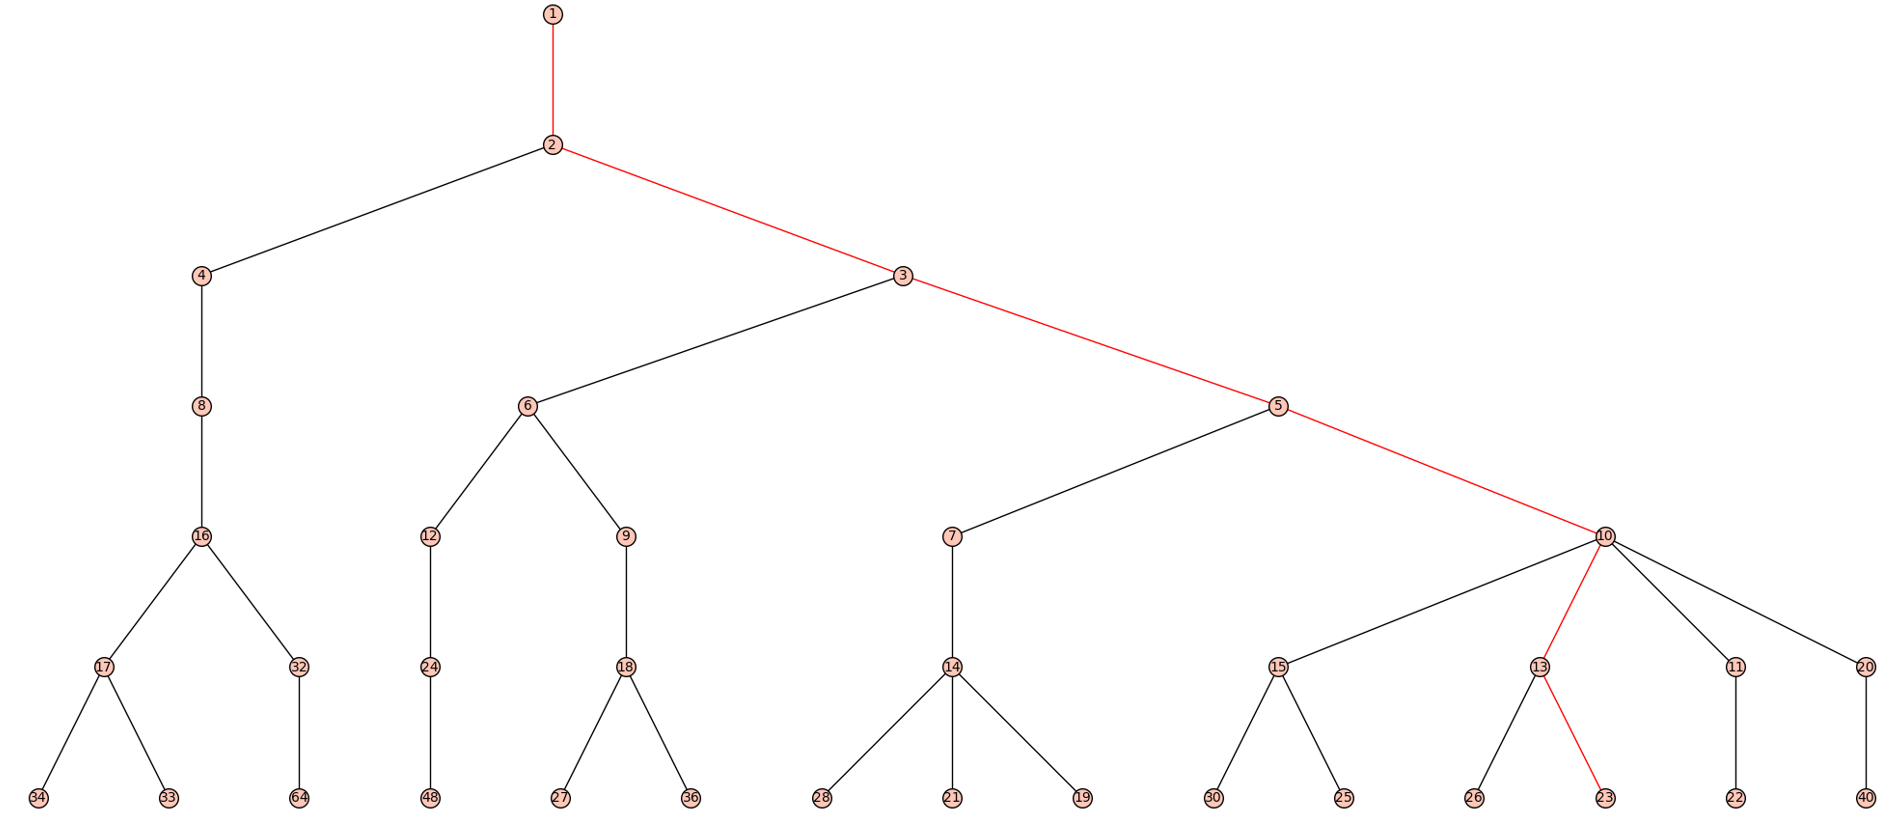

Для $n=23$ у нас получилось ровно 6 итераций. То есть получим последовательность: $x, x^2, x^3, x^5, x^{10}, x^{13}, x^{23}.$

In [ ]:
show_tree(33)

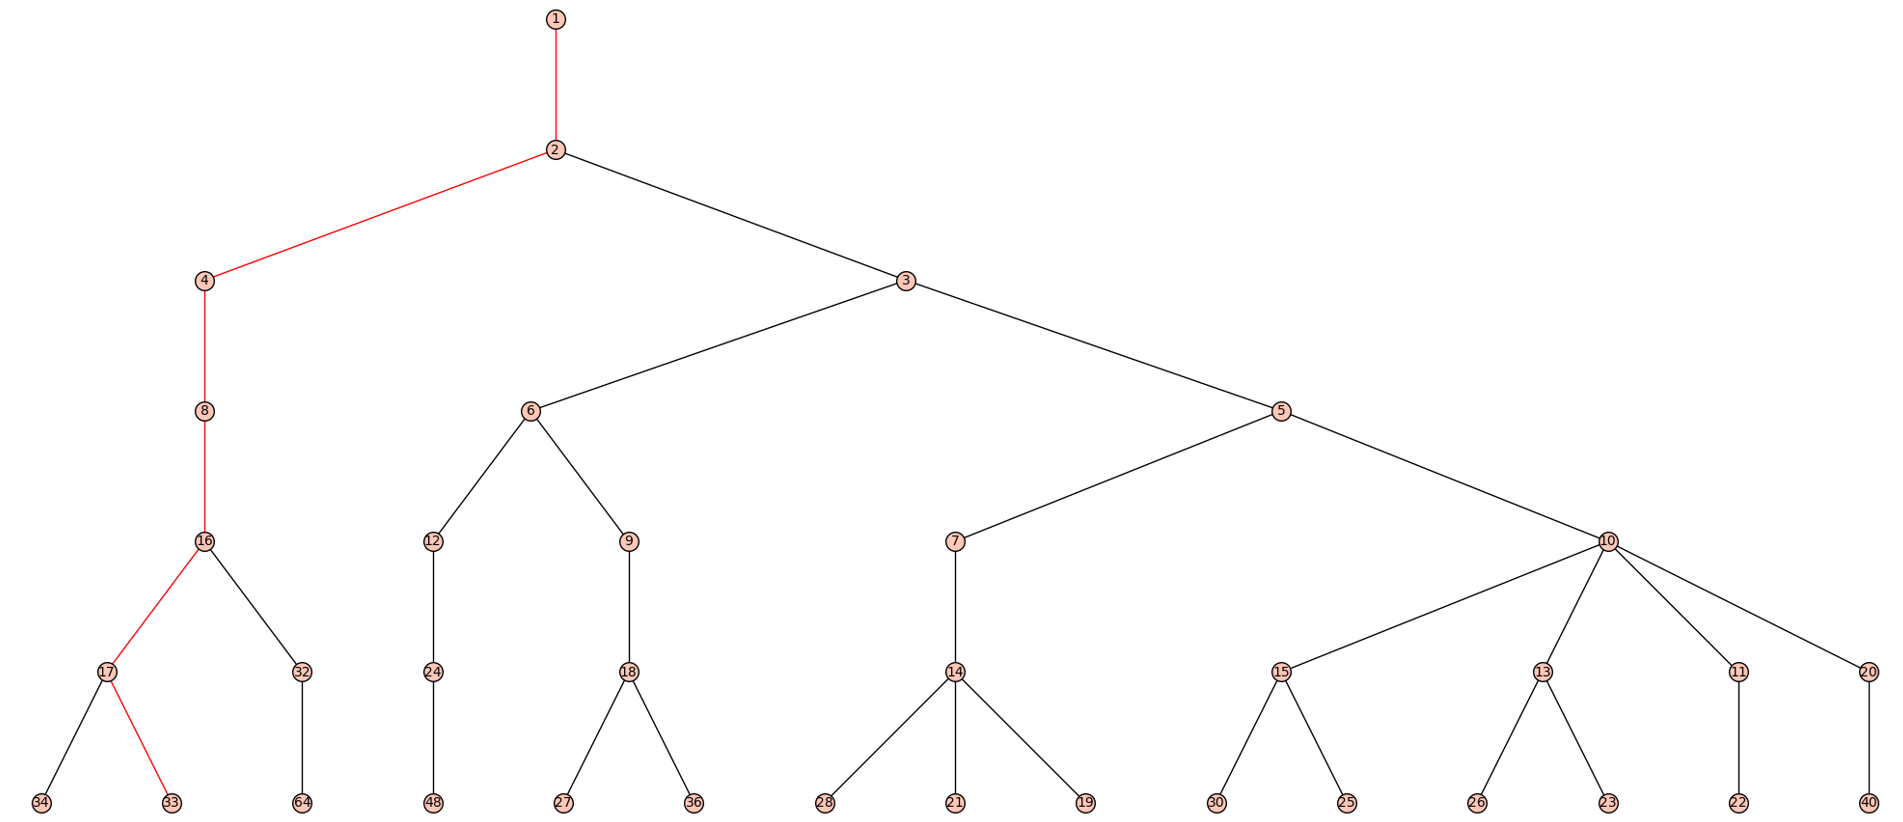

Для $n=33$ у нас получилось ровно 6 итераций. То есть получим последовательность: $x, x^2, x^4, x^8, x^{16}, x^{17}, x^{33}.$

In [ ]:
show_tree(55)

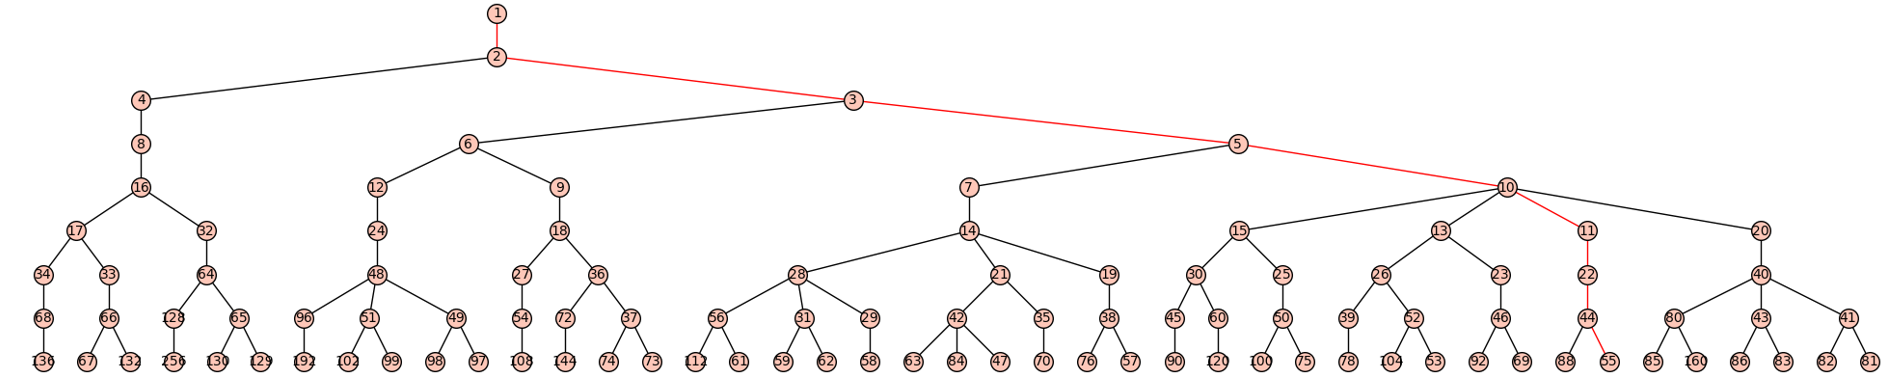

Для $n=55$ у нас получилось ровно 8 итераций. То есть получим последовательность: $x, x^2, x^3, x^5, x^{10}, x^{11}, x^{22}, x^{44}, x^{55}.$

Теперь сравним данный метод с предыдущими. <br>Например, для $n=23$ количество итераций для метода $"SX" = 7$, для метода "справа налево" 8, а для метода множителей 7. Однако в последнем рассмотренном нами методе получись 6 итераций.<br>
Или, например, если $n=55$, то количесвто итераций в методе $"SX" = 9$, для метода справа налево 10, а для метода множителей 8. Если использовать дерево степеней, то получится 8 итераций. <br>
Таким образом можно сделать вывод о том, что алгоритм "дерево степеней" будет давать результат или такой же, как метод множителей или лучше. Однако если сравнивать с первыми двумя методами, то "дерево степеней" сработает не хуже, чем данные методы.

## Выводы

В данной работе програмно были реализованы бинарный метод возведения в степень SX, метод возведения в степень справа налево и дерево степеней. Метод множителей бал проделан вручную. Наиболее эффективным оказался алгоритм "дерево степеней". Самым неэффективным метод возведения в степень справа налево. При реализации методов использованы системы компьютерной алгебры SageMath.